# theano Tutorial

Available at https://github.com/zakkum42/theano_tutorial

## What’s Theano
A Python library for symbolic mathematics 
* Symbolic expression language/compiler 
* Tightly integrated with the Python ecosystem
* Fast C/CUDA back-end and transparent GPU acceleration

Developed at University of Montreal / Canada (January 2008)

## Basic Concepts
### General Steps of theano Applications
* import theano package
* Define theano _variables_
* Define _symbolic expressions_ using variables
* Compile a _function_ that can compute numeric values using expressions
* Execute that function on data

#### import theano package

In [98]:
import theano
import theano.tensor as T
theano.__version__

'0.9.0.dev-c697eeab84e5b8a74908da654b66ec9eca4f1291'

In [99]:
# Other libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Define theano variables
##### Constants

In [100]:
Lr = T.constant(0.01, 'LearingRate', dtype='float64')
print (Lr)

TensorConstant{0.01}


In [101]:
type(Lr)

theano.tensor.var.TensorConstant

##### Scalars (0-d)

In [102]:
Lr = T.scalar(dtype='float64')
# or
Lr = T.dscalar('LearningRate')

Other scalar types:

|Usage      |Size/Type |
|-----------|----------|
|T.fscalar()|float32   |
|T.dscalar()|float64   |
|T.bscalar()|int8      |
|T.wscalar()|int16     |
|T.iscalar()|int32     |
|T.lscalar()|int64     |
|T.cscalar()|complex64 |
|T.zscalar()|complex128|

##### Vectors (1-d)

In [103]:
X = T.vector('X', dtype='float32')
# or
Y = T.dvector('Y') # dtype='float64'

In [104]:
type(X)

theano.tensor.var.TensorVariable

##### Matrices (2-d)

In [105]:
W = T.matrix('W', dtype='float32')
# or
b = T.dmatrix('b') # dtype='float64'

#### Define symbolic expressions using variables
Example: $y = 2 * x + 5$

In [106]:
a = T.constant(2,'a')
x = T.scalar('X')
c = T.constant(5,'c')

In [107]:
y = a * x + c

#### Compile Function
Example: $f(x) = y = 2 * x + 5$

In [108]:
fx = theano.function(inputs=[x], outputs=y)

#### Execute function
Example: $f(5)$

In [109]:
# Now let's try
fx(5)

array(15.0, dtype=float32)

#### More on Symbolic Expressions

In [110]:
from theano import pp


In [111]:
pp(y)

'((TensorConstant{2} * X) + TensorConstant{5})'

In [112]:
pp(fx.maker.fgraph.outputs[0])

'HostFromGpu(GpuElemwise{Composite{(i0 + (i1 * i2))}}[(0, 2)](CudaNdarrayConstant{5.0}, CudaNdarrayConstant{2.0}, GpuFromHost(X)))'

In [113]:
theano.printing.debugprint(y)

Elemwise{add,no_inplace} [id A] ''   
 |Elemwise{mul,no_inplace} [id B] ''   
 | |TensorConstant{2} [id C]
 | |X [id D]
 |TensorConstant{5} [id E]


In [114]:
theano.printing.debugprint(fx)

HostFromGpu [id A] ''   2
 |GpuElemwise{Composite{(i0 + (i1 * i2))}}[(0, 2)] [id B] ''   1
   |CudaNdarrayConstant{5.0} [id C]
   |CudaNdarrayConstant{2.0} [id D]
   |GpuFromHost [id E] ''   0
     |X [id F]


In [115]:
theano.printing.pydotprint(y, outfile="y.png", var_with_name_simple=True)

The output file is available at y.png


![y](y.png)

In [116]:
theano.printing.pydotprint(fx, outfile="fx.png", var_with_name_simple=True)

The output file is available at fx.png


![fx](fx.png)

#### Vector Example
Example: $f(X,Y) = X + Y$, where $X$, and $Y$ are vectors.

In [117]:
# Define Symbolic Variables
X = T.vector('X')
Y = T.vector('Y')

In [118]:
# Define Symbolic Expression
sum = X+Y

In [119]:
# Define Function f(X,Y) 
sumXY = theano.function(inputs=[X,Y], outputs=sum)

In [120]:
# add [1,1,1] and [2,2,2]
sumXY([1,1,1], [2,2,2])

array([ 3.,  3.,  3.], dtype=float32)

#### Matrix Example
Example: $f(X) = X^T$ and $g(X,Y) = X Y$

In [121]:
# Define Symbolic Variables
Xm = T.matrix('X')
Ym = T.matrix('Y')

In [122]:
# Define Symbolic Expression
X_transpose = T.transpose(Xm)
XY_prod = T.dot(Xm,Ym)

In [123]:
# Define Functions
Xt = theano.function([Xm], X_transpose)

In [124]:
X = np.matrix([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
], dtype='float32')
print "X="; print X

Y = np.identity(3, dtype='float32') * 5
print "Y="; print Y

X=
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]
Y=
[[ 5.  0.  0.]
 [ 0.  5.  0.]
 [ 0.  0.  5.]]


In [125]:
Xt(X)

array([[ 1.,  4.,  7.],
       [ 2.,  5.,  8.],
       [ 3.,  6.,  9.]], dtype=float32)

In [126]:
prodXY = theano.function([Xm,Ym], XY_prod)

In [127]:
prodXY(X, Y)

array([[  5.,  10.,  15.],
       [ 20.,  25.,  30.],
       [ 35.,  40.,  45.]], dtype=float32)

#### Tensor Operations
* Data types (vector, matrix, tensor3, tensor4, etc.)
* Vector/Matrix (dot, transpose, ones,  zeros, etc.)
* Power (power, exp, exp2, etc.)
* Logarithm (log, log10, log2, log1p, etc.)
* Trigonometry (sin[h], cos[h], tan[h], etc.)
* Logic operators (and, or, xor, etc.) 
* Comparators (eq, lt, gt, ge, le, neq, etc.) 
* Bitwise operators (bitwise_and, bitwise_or, etc.)
* max, min, argmax, argmin, etc.
* square, sqrt, etc.
* ceil, floor, etc.

In [128]:
logX = T.log(Xm)

In [129]:
flX = theano.function([Xm], logX)

In [130]:
X

matrix([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.]], dtype=float32)

In [131]:
flX(X)

array([[ 0.        ,  0.69314718,  1.09861231],
       [ 1.38629436,  1.60943794,  1.79175949],
       [ 1.94591022,  2.07944155,  2.19722462]], dtype=float32)

## More Theano Concepts
### Default Input Values
Example: Consider following function definition in python:
<pre>
def fxy(x, y=1): 
</pre>
Let's mimic this with _theano_.

In [132]:
from theano import In
# Define Symbolic Expression
x, y = T.dscalars('x', 'y')
z = x + y

In [133]:
# Define Functions
fxy = theano.function([x, In(y, value=1)], z)

In [134]:
fxy(33)

array(34.0)

In [135]:
fxy(33,2)

array(35.0)

### Input Variable Names
Example: Consider following function definition in python:
<pre>
def fxyw(x, y=1, weight=2): 
</pre>
Let's mimic this with _theano_.


In [136]:
# Define Symbolic Expression
x, y, w = T.dscalars('x', 'y', 'w')
z = (x + y) * w

In [137]:
# Define Functions
fxyw = theano.function([x, In(y, value=1), 
                           In(w, value=2, name='weight')], z)

In [138]:
fxyw(33)

array(68.0)

In [139]:
fxyw(33, 2)

array(70.0)

In [140]:
fxyw(33, 0, 1)

array(33.0)

In [141]:
fxyw(33, weight=1)

array(34.0)

In [142]:
fxyw(33, weight=1, y=0)

array(33.0)

### Shared Variables 
Example: Create a shared variable to count number of _theano_ function calls.
<pre>
def fy(&lt;inputs&gt;):
    &lt;function body&gt;
    count = count + 1
</pre>

In [143]:
# Define Symbolic Expression
a = T.constant(2)
x = T.scalar()
c = T.constant(5)
y = a * x + c 
z = y**2

In [144]:
# Define shared variable
count = theano.shared(0)

In [145]:
# Define Functions
fy = theano.function([x], y, updates=[(count, count+1)])

In [146]:
fz = theano.function([x], z, updates=[(count, count+1)])

In [147]:
print count.get_value() # count = 0
print fy(2) 
print fz(2) # y^2
print count.get_value() # count = 2

0
9.0
81.0
2


In [148]:
count.set_value(0)
print count.get_value() # count = 0

0


### Variable Substitution
Example:

In [149]:
# Define variables
x = T.scalar()
y = 2 * x + 5 
z = y**2

In [150]:
# define function
fy2 = theano.function([x], z)

In [151]:
theano.printing.pydotprint(z, outfile="z.png", var_with_name_simple=True)

The output file is available at z.png


![fy2](z.png)

In [152]:
print fy2(5)

225.0


In [153]:
# new variable. Same type as y.
n=T.scalar('n', dtype=y.dtype)

In [154]:
# new function.
# y in the calculation tree is replaced by n.
fyn = theano.function([n], z, givens=[(y, n)])

In [155]:
print fyn(5)

25.0


In [156]:
theano.printing.pydotprint(fyn, outfile="fyn.png", var_with_name_simple=True)

The output file is available at fyn.png


![fyn](fyn.png)

### Random Variables
Example: Create a uniform random variable.

In [157]:
from theano.tensor.shared_randomstreams import RandomStreams
# Create a RNG instance, as a “shared variable”
rng = RandomStreams()

In [158]:
# Create a 'uniform' random variable
rv_u = rng.uniform()

In [159]:
# create a theano function from the variable
fu = theano.function([], rv_u)

In [160]:
for i in range(10):
    print fu()

0.240574300289
0.125310853124
0.352891802788
0.0947354361415
0.589268386364
0.698480427265
0.357224285603
0.304968297482
0.231035396457
0.182564839721


In [161]:
anArray = []
for i in range(1000):
    anArray.append(fu())

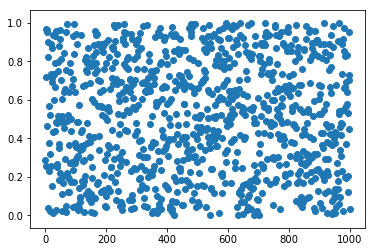

In [162]:
plt.scatter(range(1000),anArray)

In [163]:
# Seeding RNG
rng = RandomStreams(seed=1234)

In [164]:
# Other distributions
rv_u = rng.binomial((3,3))
rv_n = rng.normal((2,2))
rv_i = rng.random_integers(high=1024)

In [165]:
# Use RV as regular shared variable
y = rv_i ** 2

In [166]:
# define Theano function
gi = theano.function([], (rv_i, y))

In [167]:
for i in range(10):
    print gi()

[array(633L, dtype=int64), array(400689L, dtype=int64)]
[array(902L, dtype=int64), array(813604L, dtype=int64)]
[array(61L, dtype=int64), array(3721L, dtype=int64)]
[array(937L, dtype=int64), array(877969L, dtype=int64)]
[array(344L, dtype=int64), array(118336L, dtype=int64)]
[array(406L, dtype=int64), array(164836L, dtype=int64)]
[array(181L, dtype=int64), array(32761L, dtype=int64)]
[array(259L, dtype=int64), array(67081L, dtype=int64)]
[array(116L, dtype=int64), array(13456L, dtype=int64)]
[array(707L, dtype=int64), array(499849L, dtype=int64)]


In [168]:
# Create a RNG class
rng = RandomStreams()
# Create a 'uniform' random variable  
rv_u = rng.uniform() 

# create a theano function from the variable
gu = theano.function([], rv_u, no_default_updates=True)

In [169]:
for i in range(5):
    print gu()

0.000879142258782
0.000879142258782
0.000879142258782
0.000879142258782
0.000879142258782


In [170]:
# create output y from rv_u
y = 2 * rv_u - 2 * rv_u
fuy = theano.function([], y)

In [171]:
for i in range(5):
    print fuy()

0.0
0.0
0.0
0.0
0.0


### Evaluating Expressions

In [172]:
# Define Symbolic Variables
a = T.constant(2)
x = T.scalar()
c = T.constant(5)

# Define Symbolic Expression
y = a * x + c # Also y = 2 * x + 5

# Define Function f(x) = y
fx = theano.function(inputs=[x], outputs=y)

fx(2)

array(9.0, dtype=float32)

In [173]:
# Execute/Calculate
print y.eval({x: 2})

9.0


## Examples
### [Logistic Regression](01-Theano_logistic.ipynb)
### [Multilayer Perceptron](02-Theano_MLP.ipynb)
### [Convolutional Neural Networks (LeNeT5)](03-Theano_lenet.ipynb)


## Installation Notes
### Installing theano on Windows
* WinPython 
    * Install WinPython
    * Includes theano 0.7 and other dependencies
    * Includes the g++ compiler
    * Add g++ compiler to your PATH
* Anaconda
    * Install Anaconda, or miniconda
    * Install theano, _conda install theano_
    * Install g++ compiler, _conda install m2w64-gcc_
* For GPU
    * Install latest drivers for GPU card
    * Install CUDA Development Kit
    * Install cuDNN if your GPU supports
    * Install Visual C++ compiler

### Installing theano on Linux
* Install/update python 
<pre>
$sudo apt-get install python-numpy python-scipy python-dev python-pip python-nose g++ libopenblas-dev git 
$sudo pip install Theano
</pre>

* For GPU
    * Install latest drivers for GPU card
    * Install CUDA Development Kit
    * Install cuDNN if your GPU supports
    * Add nvcc compiler to your PATH

### Using GPU with theano
* Environment variable
<pre>
export THEANO_FLAGS=“device=gpu0,floatX=float32”
python …
</pre>
or
<pre>THEANO_FLAGS=“device=gpu0,floatX=float32” python …</pre>

* Config File ~/.theanorc
<pre>
[global]
floatX = float32
device = gpu0 
</pre>

## Resources

* Theano Website: http://deeplearning.net/software/theano
* Theano Documentation: http://deeplearning.net/software/theano/#documentation
* Deep Learning with Theano: http://www.deeplearning.net/tutorial
* Theano Workshop: https://github.com/goodfeli/theano_exercises
* WinPython: http://winpython.sourceforge.net
* Anaconda: http://www.continuum.io/